In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading a csv file
df=pd.read_csv('student_info.csv')

In [3]:
#Top 5 records
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
#Shape of a dataframe
df.shape

(200, 2)

In [5]:
#Descriprtive information
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [6]:
#Checking for nan values
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [7]:
#Filling nan with mean
df['study_hours'].fillna(df['study_hours'].mean(),inplace=True)

<AxesSubplot:xlabel='study_hours', ylabel='student_marks'>

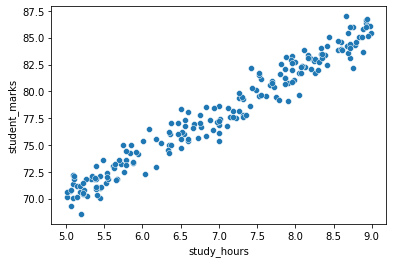

In [8]:
#Scatter plot
sns.scatterplot(x='study_hours',y='student_marks',data=df)

<AxesSubplot:>

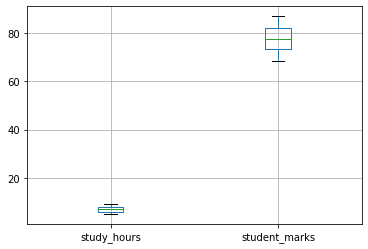

In [9]:
#checking for outliers
df.boxplot()
#No outliers in a df

<AxesSubplot:xlabel='study_hours', ylabel='Density'>

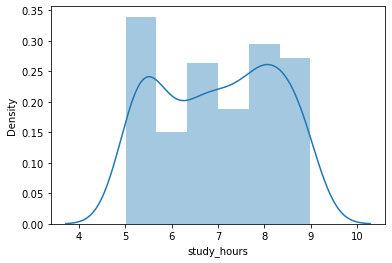

In [10]:
sns.distplot(df['study_hours'])

<AxesSubplot:xlabel='student_marks', ylabel='Density'>

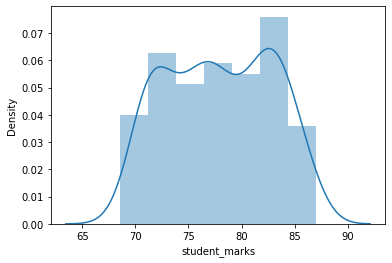

In [11]:
sns.distplot(df['student_marks'])

In [12]:
#Dependent & Independent variable
X=df['study_hours'].to_numpy().reshape(-1, 1)
y=df['student_marks'].to_numpy().reshape(-1, 1)

In [13]:
#Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.20,random_state=14)

In [14]:
print(f"x_train shape :\t{x_train.shape}")
print(f"y_train shape :\t{y_train.shape}")
print(f"x_test shape :\t{x_test.shape}")
print(f"y_test shape :\t{y_test.shape}")

x_train shape :	(160, 1)
y_train shape :	(160, 1)
x_test shape :	(40, 1)
y_test shape :	(40, 1)


In [15]:
#Linear Regression
from sklearn.linear_model import LinearRegression

In [16]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
print("Training Score :   ",lr_model.score(x_train,y_train))
print("Testing Score :   ",lr_model.score(x_test,y_test))

Training Score :    0.9589296102374956
Testing Score :    0.9506559873821964


In [17]:
#Saving a model
import pickle
# create an iterator object with write permission - model.pkl
with open('Linear_regression_model.pkl', 'wb') as files:
    pickle.dump(lr_model, files)